In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lec9_graphs

plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('ggplot')
df = pd.read_csv('spamdata_esl_colnames.csv').drop(columns='Unnamed: 0')

In [2]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
print(df['spam'].value_counts('%'))

0    0.605955
1    0.394045
Name: spam, dtype: float64


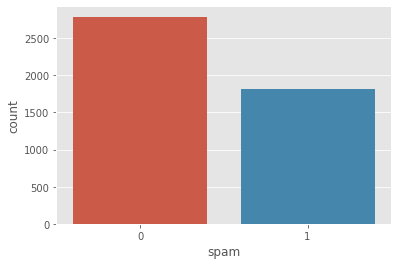

In [5]:
sns.countplot(df['spam'])

In [6]:
exclude_df = df.filter(regex='word_freq_*')
exclude_df['spam'] = df['spam']
store_means_no_spam = exclude_df.query('spam == 0').drop(columns='spam').apply(lambda x: np.mean(x), axis=0)
store_means_spam = exclude_df.query('spam == 1').drop(columns='spam').apply(lambda x: np.mean(x), axis=0)

IndexError: tuple index out of range

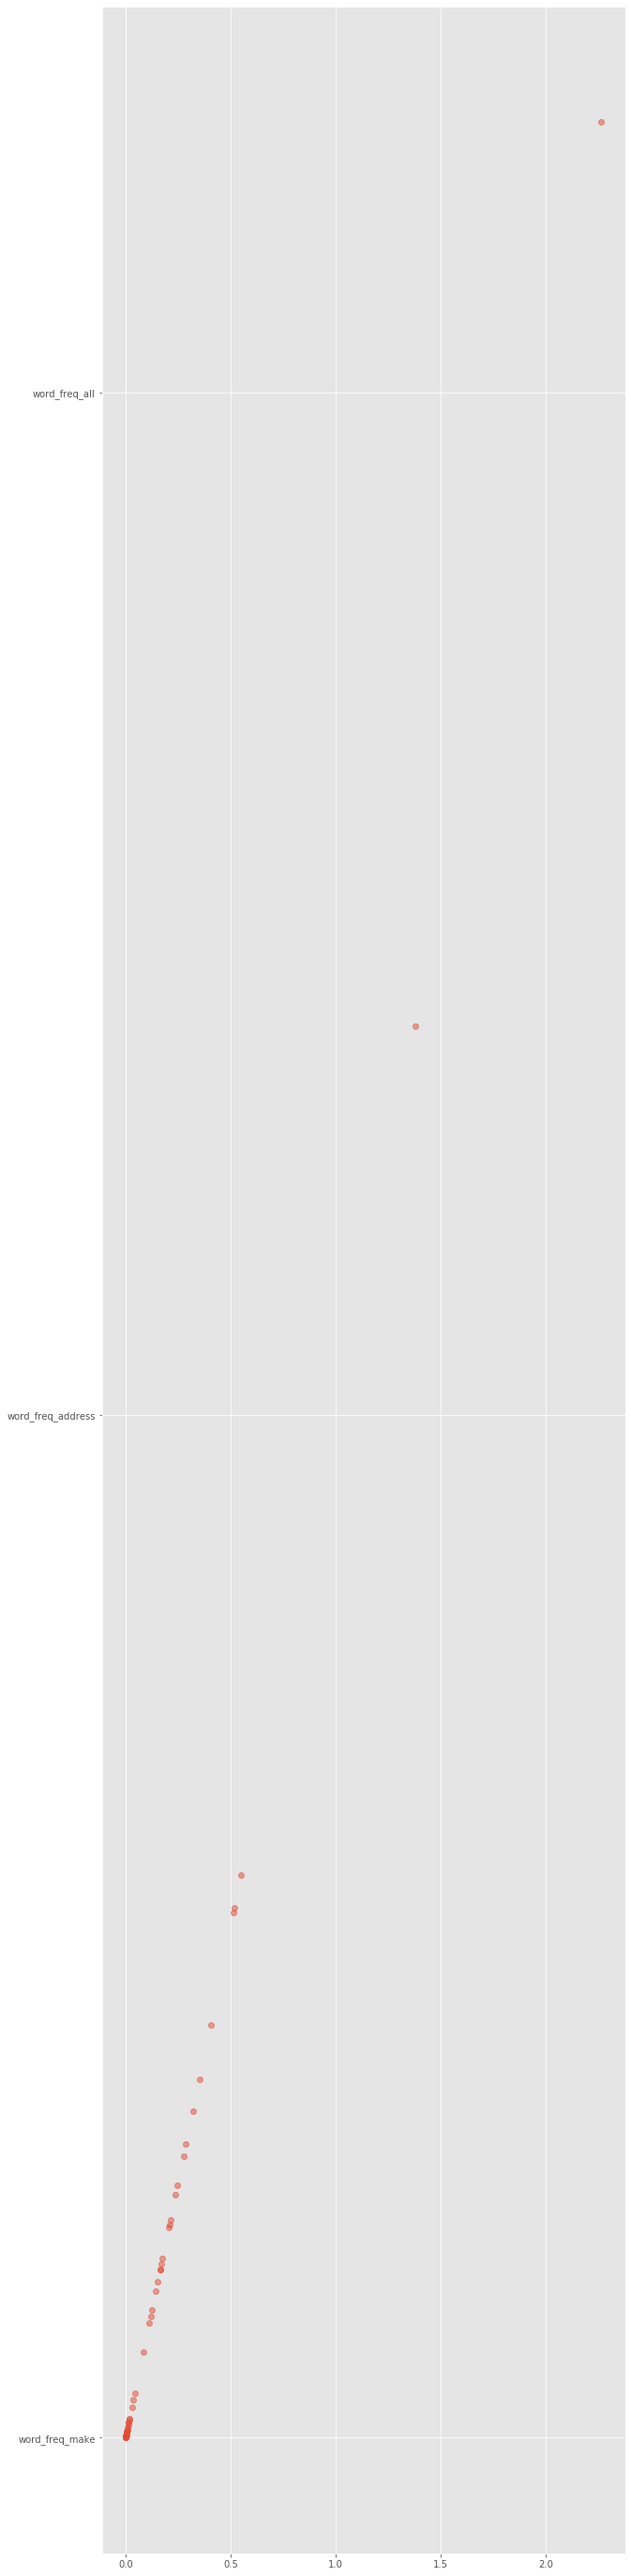

In [16]:
plt.figure(figsize=(10,50))
plt.plot(store_means_spam, store_means_spam.values, 'o', alpha=.5,label='Spam')
plt.plot(store_means_no_spam, store_means_no_spam.index,'^',alpha=.5, label='No Spam')
plt.xlabel('Frequency')
plt.legend()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [18]:
X_train , X_test , y_train , y_train = train_test_split(df.loc[:,'word_freq_make':'capital_run_length_total'],
                                                       df['spam'], test_size=.33 , random_state=11238)

In [20]:
decision_stump = DecisionTreeClassifier(max_depth=1,random_state=11238).fit(X_train,y_train)

adaboost_classifies = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                        random_state=11238).fit(X_train,y_train)

ValueError: Number of labels=1519 does not match number of samples=3082